In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import logging
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
import time

In [17]:
data = pd.read_csv(r'D:\IDM\Zips\sf-crime_2\train.csv')
print(data.head())
print(data.isnull().sum())

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

In [18]:
print(data.duplicated().sum())
print(data.loc[data.duplicated()])

2323
                      Dates            Category  \
582     2015-05-12 11:30:00       LARCENY/THEFT   
1133    2015-05-03 23:00:00           VANDALISM   
1822    2015-05-02 02:30:00             ASSAULT   
2109    2015-05-01 11:30:00      OTHER OFFENSES   
3004    2015-04-29 10:00:00           VANDALISM   
3335    2015-04-28 12:40:00      OTHER OFFENSES   
3734    2015-04-27 12:00:00      MISSING PERSON   
4516    2015-04-18 16:00:00       LARCENY/THEFT   
4773    2015-04-17 21:55:00           VANDALISM   
5655    2015-04-15 20:30:00       LARCENY/THEFT   
5681    2015-04-15 19:30:00       LARCENY/THEFT   
5786    2015-04-15 15:45:00      OTHER OFFENSES   
5800    2015-04-15 15:00:00       LARCENY/THEFT   
7224    2015-04-04 22:00:00            BURGLARY   
7428    2015-04-04 12:40:00       LARCENY/THEFT   
7864    2015-04-03 14:15:00        NON-CRIMINAL   
7978    2015-04-03 09:00:00       VEHICLE THEFT   
8252    2015-04-02 16:50:00      MISSING PERSON   
8704    2015-04-01 13:00:0

In [19]:
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

(878049, 9)
(875726, 9)


In [20]:
cats=data['Category'].unique()
print(cats)

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


In [21]:
print(len(cats))

39


In [23]:
cats_dict=dict()
cnt=1
for cat in cats:
    cats_dict[cat] =cnt
    cnt +=1
print(cats_dict)
    

{'WARRANTS': 1, 'OTHER OFFENSES': 2, 'LARCENY/THEFT': 3, 'VEHICLE THEFT': 4, 'VANDALISM': 5, 'NON-CRIMINAL': 6, 'ROBBERY': 7, 'ASSAULT': 8, 'WEAPON LAWS': 9, 'BURGLARY': 10, 'SUSPICIOUS OCC': 11, 'DRUNKENNESS': 12, 'FORGERY/COUNTERFEITING': 13, 'DRUG/NARCOTIC': 14, 'STOLEN PROPERTY': 15, 'SECONDARY CODES': 16, 'TRESPASS': 17, 'MISSING PERSON': 18, 'FRAUD': 19, 'KIDNAPPING': 20, 'RUNAWAY': 21, 'DRIVING UNDER THE INFLUENCE': 22, 'SEX OFFENSES FORCIBLE': 23, 'PROSTITUTION': 24, 'DISORDERLY CONDUCT': 25, 'ARSON': 26, 'FAMILY OFFENSES': 27, 'LIQUOR LAWS': 28, 'BRIBERY': 29, 'EMBEZZLEMENT': 30, 'SUICIDE': 31, 'LOITERING': 32, 'SEX OFFENSES NON FORCIBLE': 33, 'EXTORTION': 34, 'GAMBLING': 35, 'BAD CHECKS': 36, 'TREA': 37, 'RECOVERED VEHICLE': 38, 'PORNOGRAPHY/OBSCENE MAT': 39}


In [24]:
data['Category'].replace(cats_dict,inplace=True)

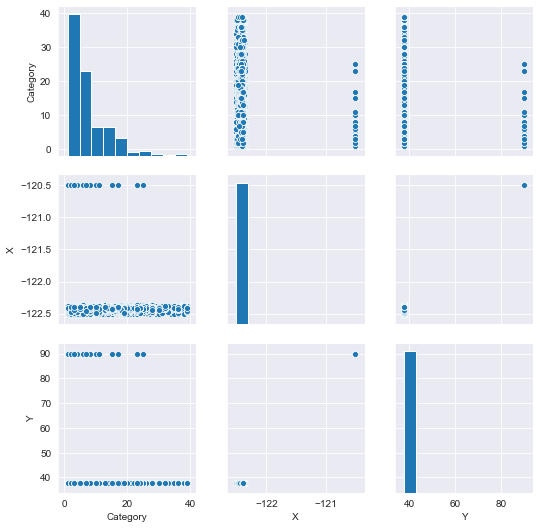

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.pairplot(data)
plt.show()

In [30]:
print(data.describe())
print(data.info())

            Category              X              Y
count  875726.000000  875726.000000  875726.000000
mean        7.222124    -122.422623      37.771032
std         6.108808       0.030363       0.457497
min         1.000000    -122.513642      37.707879
25%         3.000000    -122.432952      37.752427
50%         5.000000    -122.416446      37.775421
75%        10.000000    -122.406959      37.784380
max        39.000000    -120.500000      90.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 875726 entries, 0 to 878048
Data columns (total 9 columns):
Dates         875726 non-null object
Category      875726 non-null int64
Descript      875726 non-null object
DayOfWeek     875726 non-null object
PdDistrict    875726 non-null object
Resolution    875726 non-null object
Address       875726 non-null object
X             875726 non-null float64
Y             875726 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 106.8+ MB
None


In [39]:
data = pd.read_csv(r'D:\IDM\Zips\sf-crime_2\train.csv',parse_dates=['Dates'])
print('data info',data.info())
print('first dates',str(data['Dates'].describe()['first']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB
data info None
first dates 2003-01-06 00:01:00


In [47]:
print('first dates:',data['Dates'].describe()['first'])
print('first dates:',data['Dates'].describe()['last'])

first dates: 2003-01-06 00:01:00
first dates: 2015-05-13 23:53:00


In [48]:
print(data['Dates'].describe())

count                  878049
unique                 389257
top       2011-01-01 00:01:00
freq                      185
first     2003-01-06 00:01:00
last      2015-05-13 23:53:00
Name: Dates, dtype: object


In [50]:
print('describe:',data.describe())

describe:                    X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000


In [53]:
test= pd.DataFrame({'X':[-120.5,'Y'],'Y':[90.0,'Y']})
print(test)
test.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)
print(test)

       X   Y
0 -120.5  90
1      Y   Y
     X    Y
0  NaN  NaN
1    Y    Y
